In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

df = pd.read_csv('stud_math.csv')


def get_boxplot(column):           # Функия для построения box-plot графика
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index)],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column):          # Фкнкция для проведения теста Стьюдента
    cols = df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [6]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [7]:
null_data=df.isnull().sum()
null_data[null_data>0]

address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [8]:
df = df.drop(df[df.score.isnull()].index)# Заполнять пропуски в колонке баллов по госэкзамениу не логично т.к. это повлияет на нашу модель, поэтому удалим эти строки

In [9]:
nam_col = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
           'failures', 'famrel', 'freetime',
           'goout', 'health', 'absences']

for col in df.columns:# К числовым параметрам применяем медиану
    if col in nam_col:
        medi = df[col].median()
        df[col].fillna(value=medi, inplace=True, axis=0)
    else:
        mode_ = df[col].mode()[0]  # К не числовым параметрам применим моду
        df[col].fillna(value=mode_, inplace=True, axis=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              389 non-null    object 
 4   famsize              389 non-null    object 
 5   Pstatus              389 non-null    object 
 6   Medu                 389 non-null    float64
 7   Fedu                 389 non-null    float64
 8   Mjob                 389 non-null    object 
 9   Fjob                 389 non-null    object 
 10  reason               389 non-null    object 
 11  guardian             389 non-null    object 
 12  traveltime           389 non-null    float64
 13  studytime            389 non-null    float64
 14  failures             389 non-null    float64
 15  schoolsup            389 non-null    obj

In [11]:
# Признаки 'num_col' закодированы типом float, что является не совсем корректным. Перекодируем их в int

num_col = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
           'failures', 'famrel', 'freetime', 'studytime, granular',
           'goout', 'health', 'absences']

for col in df.columns:
    if col in num_col:
        df[col] = df[col].astype('int64')

In [12]:
#  Посмотрим на уникальные значения номенативных переменных:

df.select_dtypes(include='object').nunique()
        
# Аномальных показателей нет     

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

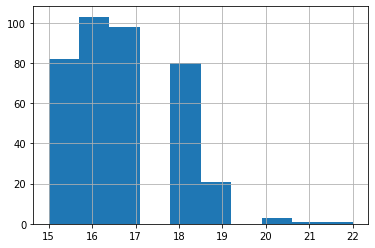

In [13]:
df.age.hist()
df.age.describe()

count    389.000000
mean       2.768638
std        1.090230
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

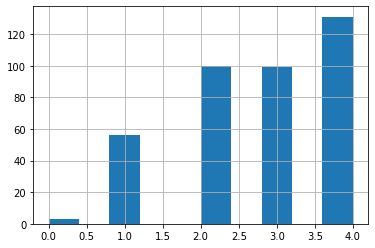

In [14]:
df.Medu.hist()
df.Medu.describe()

count    389.000000
mean       2.650386
std        2.173204
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

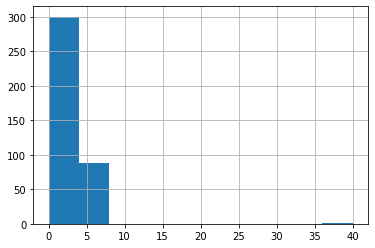

In [15]:
df.Fedu.hist()
df.Fedu.describe()

In [16]:

# В столбце 'Fedu' есть выбросы , устраним их , зная что параметр не может превышать 4

df = df.loc[df.Fedu <= 4]

count    388.000000
mean       1.399485
std        0.672609
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

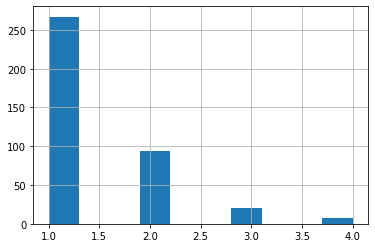

In [17]:
df.traveltime.hist()
df.traveltime.describe()

count    388.000000
mean       2.033505
std        0.839226
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

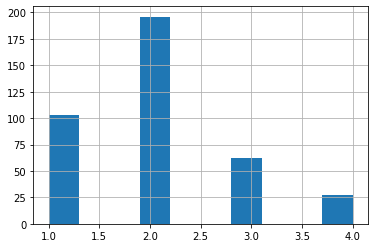

In [18]:
df.studytime.hist()
df.studytime.describe()

count    388.000000
mean       0.309278
std        0.713268
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

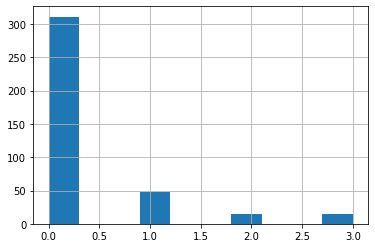

In [19]:
df.failures.hist()
df.failures.describe()

count    388.000000
mean       3.932990
std        0.898258
min       -1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64

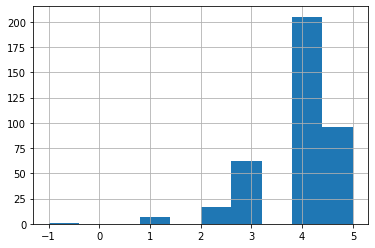

In [20]:
df.famrel.hist()
df.famrel.describe()

In [21]:
# В столбце 'famrel' есть выбросы , устраним их , зная что параметр не может быть меньше 1

df = df.loc[df.famrel >= 1]

count    387.000000
mean       3.224806
std        0.980961
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

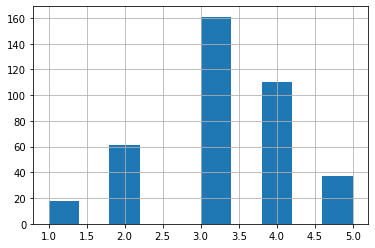

In [22]:
df.freetime.hist()
df.freetime.describe()

count    387.000000
mean      -6.108527
std        2.515981
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

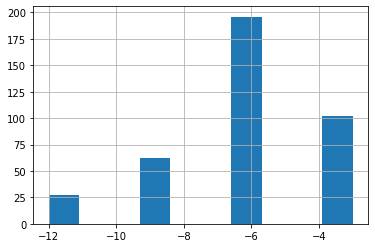

In [23]:
df['studytime, granular'].hist()
df['studytime, granular'].describe()

count    387.000000
mean       3.098191
std        1.106117
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

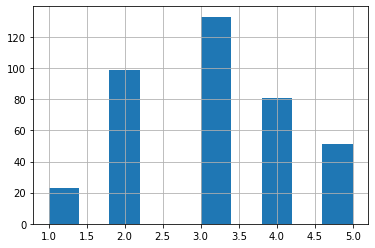

In [24]:
df.goout.hist()
df.goout.describe()

count    387.000000
mean       3.542636
std        1.379012
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

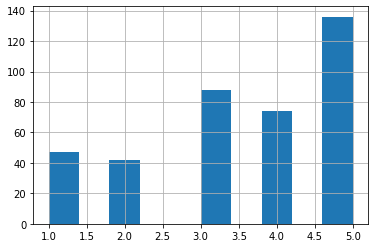

In [25]:
 df.health.hist()
df.health.describe()

count    387.000000
mean       7.217054
std       23.342004
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

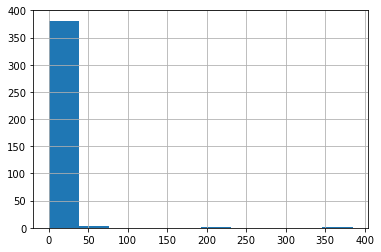

In [26]:
df.absences.hist()
df.absences.describe()

In [27]:
# В категории 'absences' есть выбросы , отфильтруем их воспользовавшись формулой интерквантильного расстояния:

IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

# Т.к. ДастаСет содержит мало данных принято решение не удалять все строки выше 75% квантиля
# Вместо этого просто удалим аномально высокие значения:

df = df.loc[df.absences < 50]

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


count    382.000000
mean       5.264398
std        6.282145
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       40.000000
Name: absences, dtype: float64

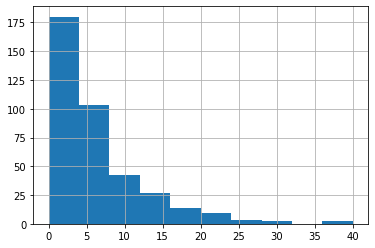

In [28]:
df.absences.hist()
df.absences.describe()

count    382.000000
mean      52.251309
std       23.040753
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

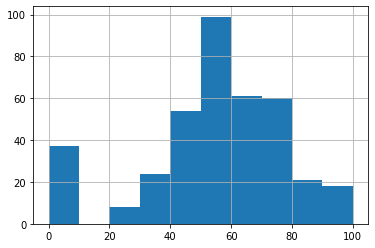

In [29]:

df.score.hist()
df.score.describe()

In [30]:
# Посмотрим на корреляцию количественных переменных:
correlation = df.corr()
correlation

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.148840,-0.142944,0.085730,-0.015755,0.198076,0.015755,0.046211,0.001486,0.116349,-0.067660,0.194815,-0.152513
Medu,-0.148840,1.000000,0.607970,-0.153420,0.079781,-0.236258,-0.079781,-0.010368,0.038190,0.067801,-0.052795,0.110712,0.213218
Fedu,-0.142944,0.607970,1.000000,-0.136632,0.015267,-0.255496,-0.015267,-0.023907,-0.005761,0.054215,0.021681,0.047044,0.121664
traveltime,0.085730,-0.153420,-0.136632,1.000000,-0.108812,0.045213,0.108812,-0.043063,-0.004271,0.054545,-0.040756,0.002648,-0.058456
studytime,-0.015755,0.079781,0.015267,-0.108812,1.000000,-0.163684,-1.000000,0.024473,-0.124801,-0.055032,-0.071303,-0.074589,0.112477
failures,0.198076,-0.236258,-0.255496,0.045213,-0.163684,1.000000,0.163684,-0.015625,0.081988,0.099470,0.075782,0.101749,-0.337445
"studytime, granular",0.015755,-0.079781,-0.015267,0.108812,-1.000000,0.163684,1.000000,-0.024473,0.124801,0.055032,0.071303,0.074589,-0.112477
famrel,0.046211,-0.010368,-0.023907,-0.043063,0.024473,-0.015625,-0.024473,1.000000,0.158725,0.053323,0.102755,-0.071625,0.059902
freetime,0.001486,0.038190,-0.005761,-0.004271,-0.124801,0.081988,0.124801,0.158725,1.000000,0.279739,0.073884,-0.011555,0.017400
goout,0.116349,0.067801,0.054215,0.054545,-0.055032,0.099470,0.055032,0.053323,0.279739,1.000000,-0.010752,0.107743,-0.124295


<AxesSubplot:>

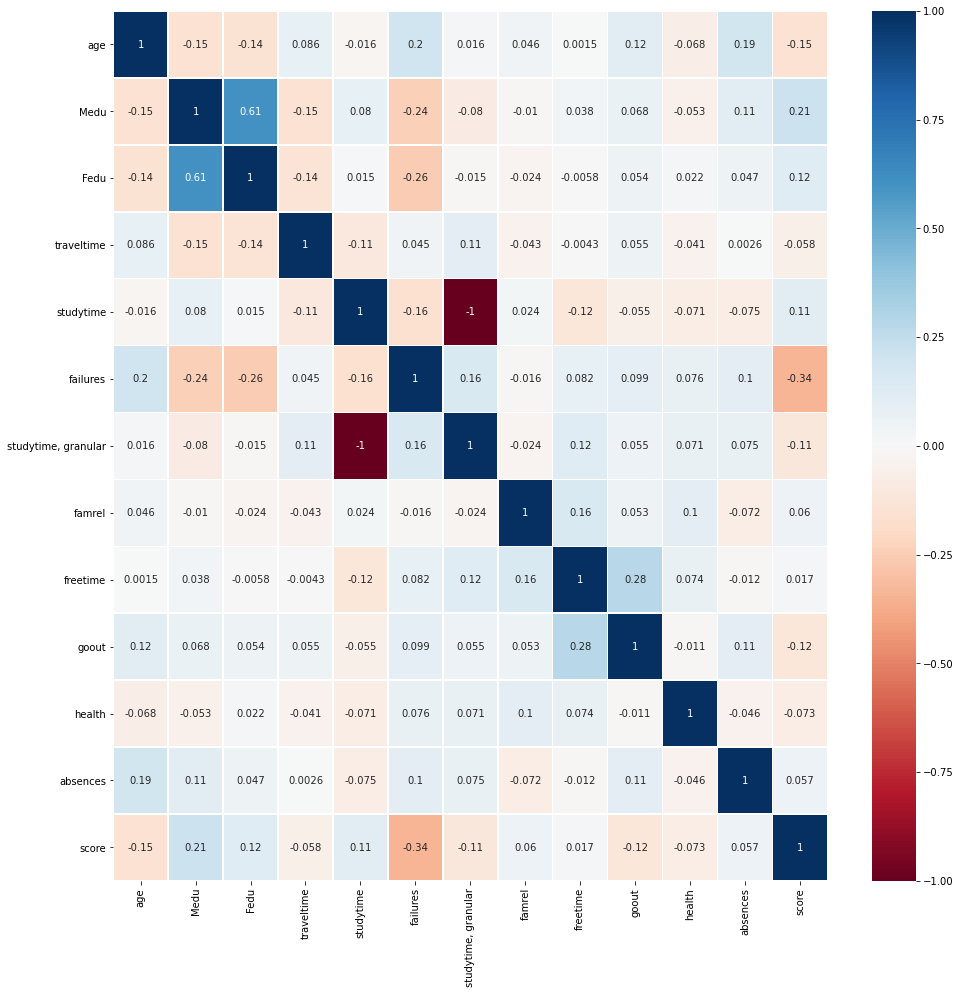

In [31]:
plt.figure(figsize=(16, 16))
sns.heatmap(correlation, annot=True, cmap='RdBu', linewidths=.5)

In [32]:
correlations_data = df.corr()['score'].sort_values()
correlations_data

failures              -0.337445
age                   -0.152513
goout                 -0.124295
studytime, granular   -0.112477
health                -0.073277
traveltime            -0.058456
freetime               0.017400
absences               0.057167
famrel                 0.059902
studytime              0.112477
Fedu                   0.121664
Medu                   0.213218
score                  1.000000
Name: score, dtype: float64


### Самой отрицательной корреляцией числовых переменных, является влияние количества внеучебных неудач (failures) на баллы по госэкзамену по математике (score). Логика подсказывает, что отрицательные корреляции оправданы, количество времени проведенного с друзьями негативно влияет на оценку.¶
### Числовые переменные слабоскоррелированы с сколичесвом баллов (score), наибольшую корреляцию показывают параметры образования родителей(Medu,Fedu) и время на учёбу помимо школы в неделю (studytime)
### Переменные "studytime " и "studytime, granular" имеют между собой сильную отрицательную корреляцию (-1) , что именно содержит в себе переменная "studytime, granular" нам не известно, из-за 100% отрицательной корреляции в дальнейшем не рекомендуется к использованию при построении модели

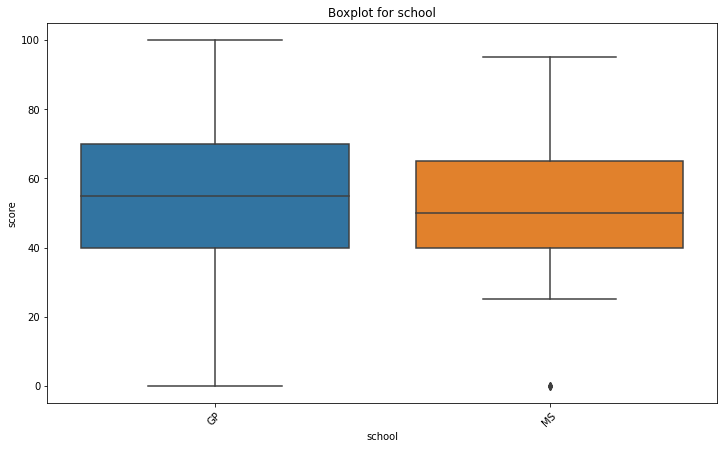

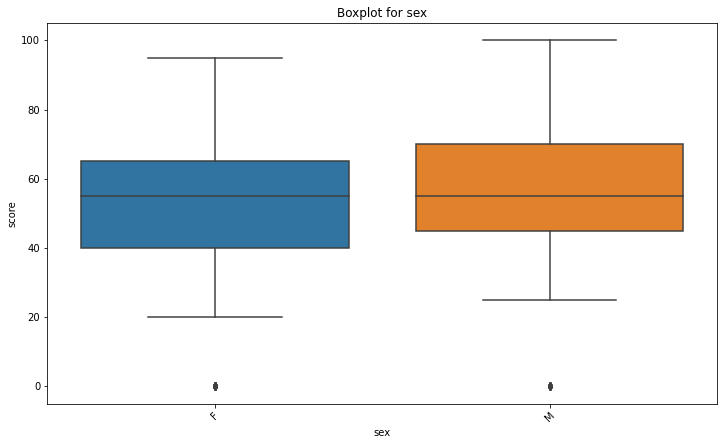

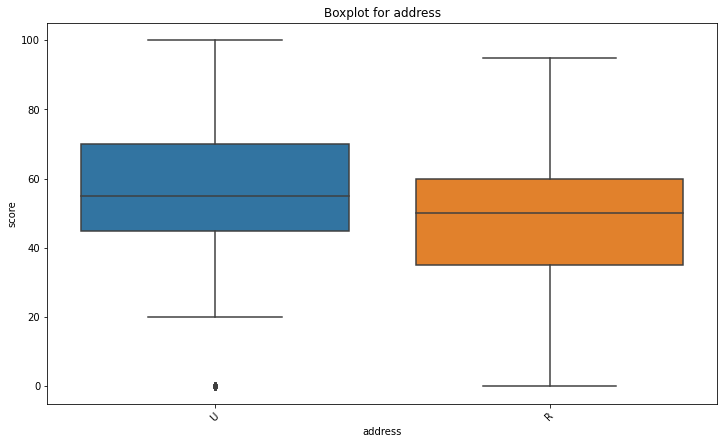

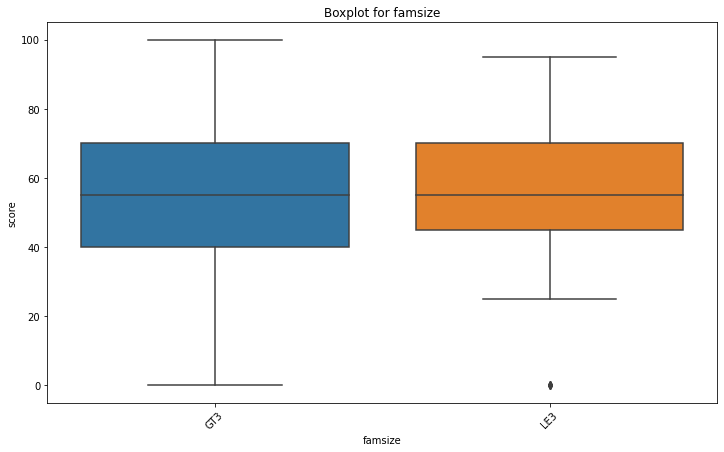

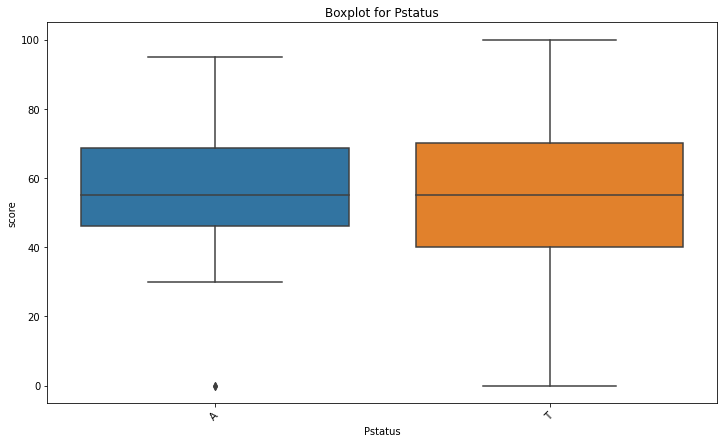

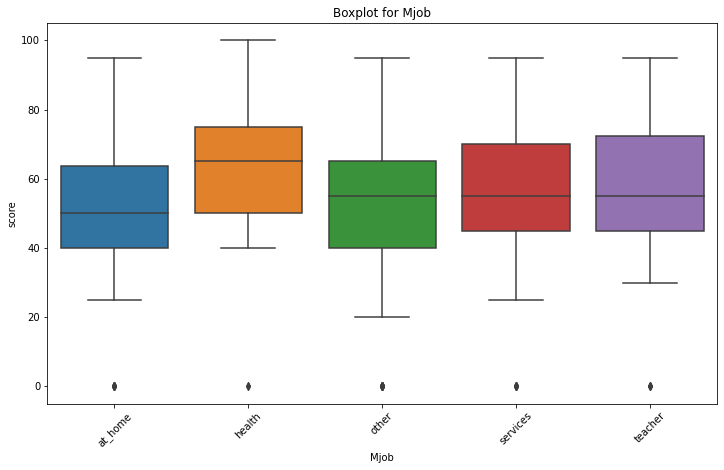

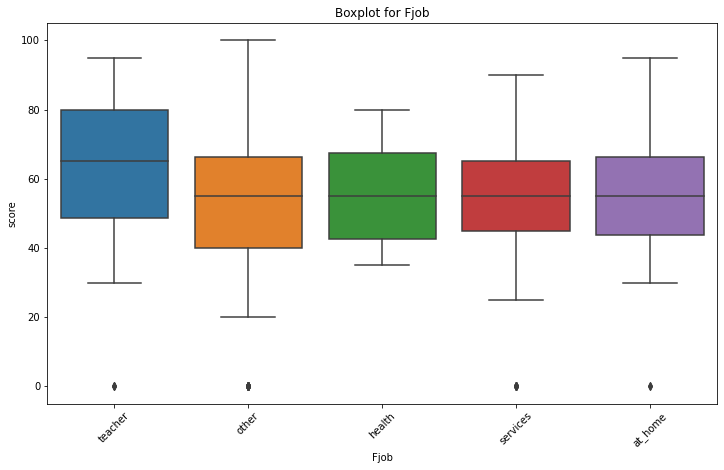

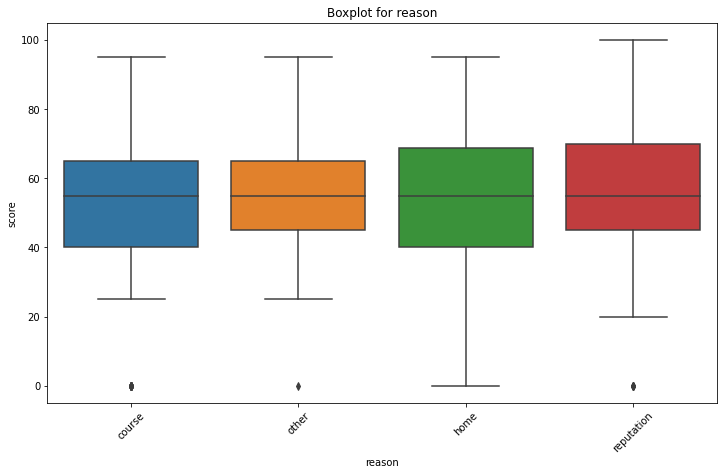

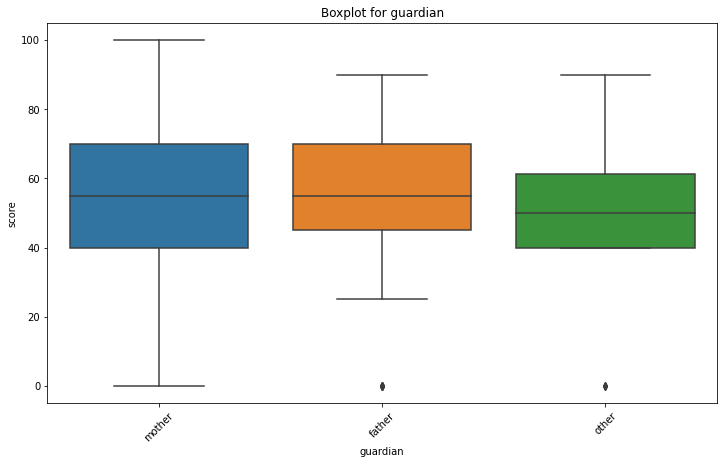

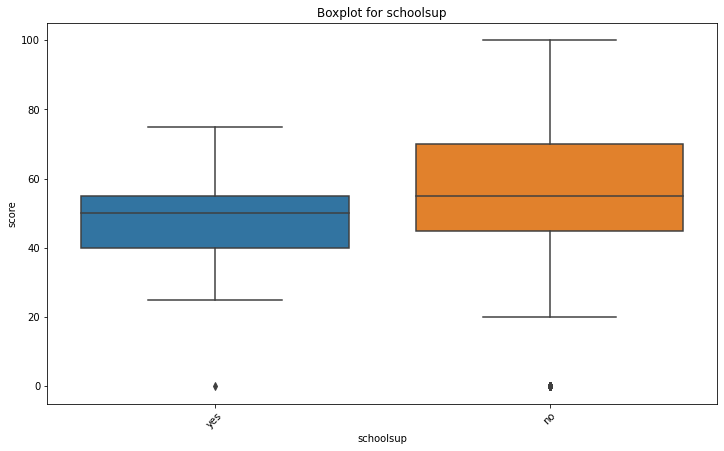

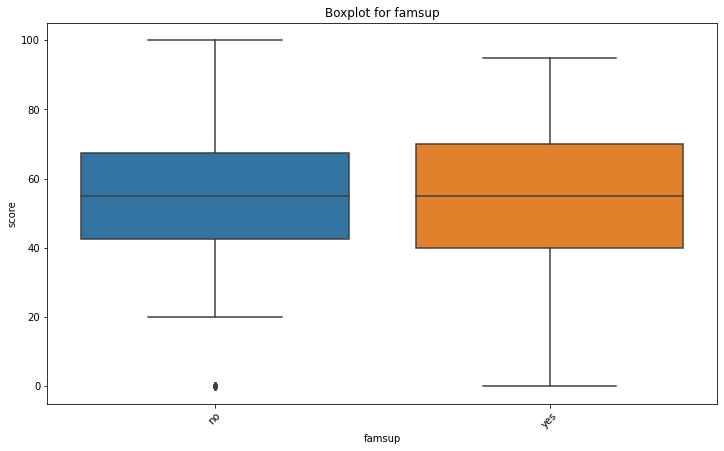

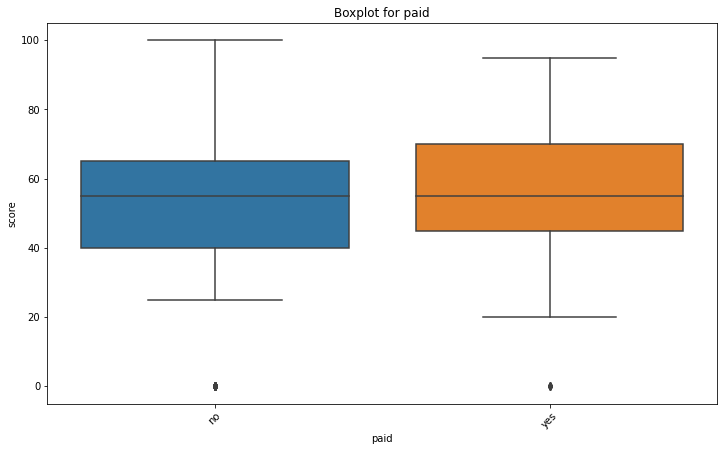

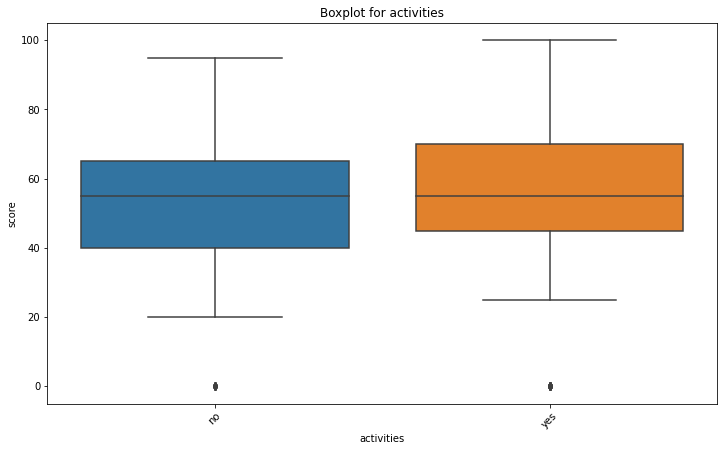

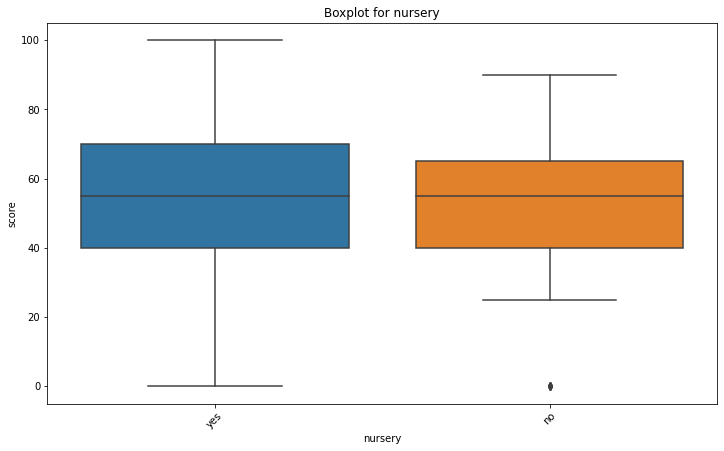

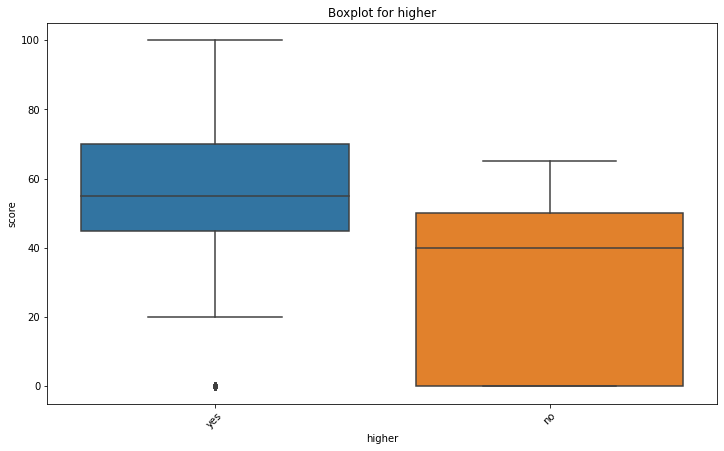

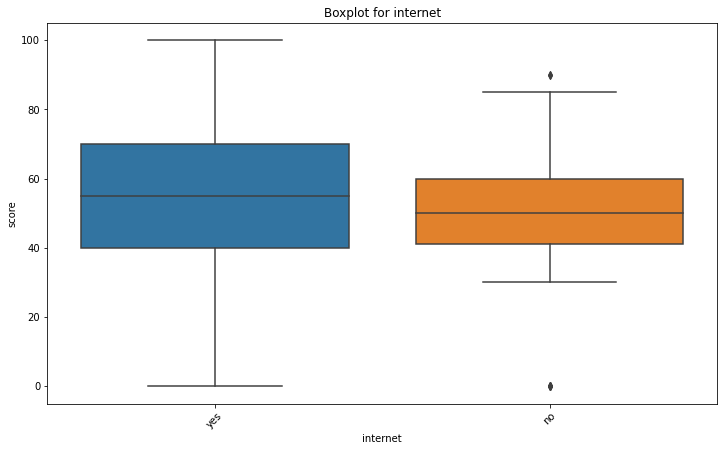

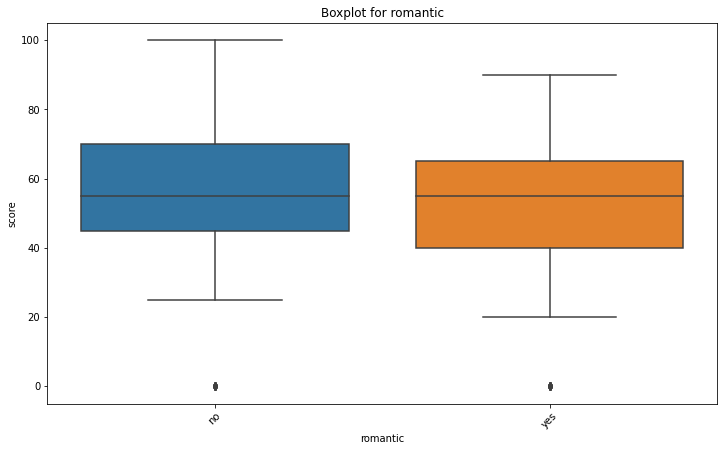

In [33]:
# Построим box-plot графики для номинативных переменных:

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

### По графикам похоже,что параметры address, Mjob, schoolsup, higher - могут влиять на оценку по математике(score)
### Проведем тест Стьюдента, чтобы проверить статистическую разницу в распределении оценок по номинативным признакам

In [34]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [35]:
df_for_model = df.loc[:, ['sex', 'address', 'Mjob', 'schoolsup', 'paid', 'failures',
                          'higher', 'romantic', 'age', 'goout', 'studytime', 'Fedu', 'Medu']]
df_for_model.head()

,sex,address,Mjob,schoolsup,paid,failures,higher,romantic,age,goout,studytime,Fedu,Medu
0,F,U,at_home,yes,no,0,yes,no,18,4,2,4,4
1,F,U,at_home,no,no,0,yes,no,17,3,2,1,1
2,F,U,at_home,yes,no,3,yes,no,15,2,2,1,1
3,F,U,health,no,yes,0,yes,yes,15,2,3,2,4
4,F,U,other,no,yes,0,yes,no,16,2,2,3,3
